In [2]:
pip install scikit-learn

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
categories = ['soc.religion.christian',
              'comp.graphics', ]
# Load Data
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [ ]:
twenty_train.head()

In [3]:
twenty_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [6]:
len(twenty_train['data'])

1183

In [11]:
twenty_train['target']

array([1, 0, 0, ..., 1, 1, 0])

## Feature Engineering

In [18]:
# Bag of Words
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

text_counts = cv.fit_transform(twenty_train['data'])

In [19]:
count_df = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())
count_df.head()

/home/avinash/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,00,000,000005102000,0001,000100255pixel,0007,000usd,0010580b,001200201pixel,...,zorn,zrz,zsoft,zt,zug,zurich,zvi,zwart,zyeh,zyxel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
text_counts_test = cv.transform(twenty_test['data'])

In [21]:
text_counts_test.shape, text_counts.shape

((787, 22270), (1183, 22270))

## Text Classification

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(text_counts, twenty_train['target'])

y_pred = clf.predict(text_counts_test)

In [23]:
from sklearn import metrics

y_test = twenty_test['target']

metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)

(0.9860228716645489, 0.9923664122137404, 0.9798994974874372)

## Text Clustering

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

tfidf = TfidfVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

tfidf_mat = tfidf.fit_transform(twenty_train['data'])

In [40]:
# Import KMeans Model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(tfidf_mat)

In [41]:
pred_labels = kmeans.labels_

In [42]:
from sklearn import metrics
# DBI score
dbi=metrics.davies_bouldin_score(tfidf_mat.toarray(), pred_labels)
# Silhoutte Score
ss=metrics.silhouette_score(tfidf_mat.toarray(), pred_labels , metric='euclidean')

dbi,ss

(9.980454338509661, 0.008717470727552442)

In [43]:
df = pd.DataFrame({'data':twenty_train['data'],'label':pred_labels })

In [44]:
df.head() 

,data,label
0,From: mussack@austin.ibm.com (Christopher Muss...,0
1,From: greg@cs.uct.ac.za (Gregory Torrance)\nSu...,0
2,From: clldomps@cs.ruu.nl (Louis van Dompselaar...,0
3,From: jayne@mmalt.guild.org (Jayne Kulikauskas...,1
4,From: jack@shograf.com (Jack Ritter)\nSubject:...,0


In [45]:
df.label.value_counts()

0    651
1    532
Name: label, dtype: int64

In [46]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text,wc_title,wc_file_name='wordcloud.jpeg'):
    # Create stopword list
    stopword_list = set(STOPWORDS) 

    # Create WordCloud 
    word_cloud = WordCloud(width = 800, height = 500, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 14).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 
    
    # Set title for word cloud
    plt.title(wc_title)
    
    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # save word cloud
    plt.savefig(wc_file_name,bbox_inches='tight')

    # show plot
    plt.show()

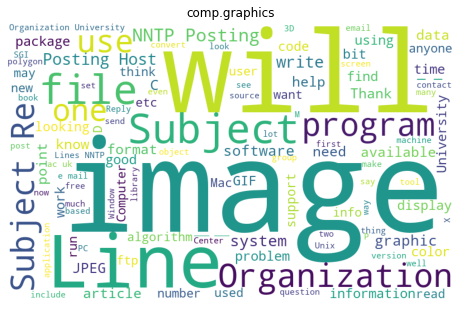

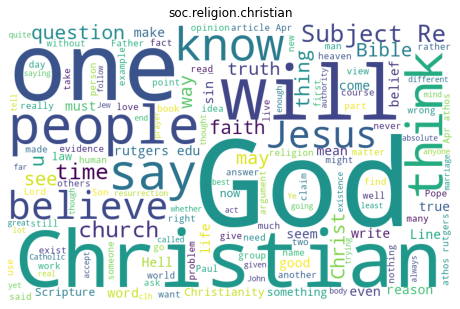

In [49]:
for i in df.label.unique():
    
    new_df=df[df.label==i]
    
    text="".join(new_df.data.tolist())
    
    word_cloud(text, twenty_train.target_names[i], twenty_train.target_names[i]+'.jpeg')

In [52]:
twenty_train.target_names[0],twenty_train.target_names[1]

('comp.graphics', 'soc.religion.christian')

In [54]:
df['new_label']= df.label.replace([0,1],['Computer','Religion'])

In [55]:
df.head()

,data,label,new_label
0,From: mussack@austin.ibm.com (Christopher Muss...,0,Computer
1,From: greg@cs.uct.ac.za (Gregory Torrance)\nSu...,0,Computer
2,From: clldomps@cs.ruu.nl (Louis van Dompselaar...,0,Computer
3,From: jayne@mmalt.guild.org (Jayne Kulikauskas...,1,Religion
4,From: jack@shograf.com (Jack Ritter)\nSubject:...,0,Computer
